<a href="https://colab.research.google.com/github/ecealptekin/Biology/blob/master/hydropathy_calculator.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Ece Alptekin
# 24156
# BIO310 Introduction to Bioinformatics
# Computer Lab 1 and Homework 1 Spring 2020

# Part 2 - Calculating Amino Acid Frequencies

In [0]:
from Bio import SeqIO
from matplotlib import pyplot as plt
from collections import Counter
import json
from collections import OrderedDict

### Getting the fasta file

In [0]:
for seq_record in SeqIO.parse("P08100.fasta.txt", "fasta"):
    seq = seq_record.seq

In [0]:
print(seq_record)

ID: sp|P08100|OPSD_HUMAN
Name: sp|P08100|OPSD_HUMAN
Description: sp|P08100|OPSD_HUMAN Rhodopsin OS=Homo sapiens OX=9606 GN=RHO PE=1 SV=1
Number of features: 0
Seq('MNGTEGPNFYVPFSNATGVVRSPFEYPQYYLAEPWQFSMLAAYMFLLIVLGFPI...APA', SingleLetterAlphabet())


In [0]:
seq

Seq('MNGTEGPNFYVPFSNATGVVRSPFEYPQYYLAEPWQFSMLAAYMFLLIVLGFPI...APA', SingleLetterAlphabet())

### Writing the frequencies in a file with the file extension _aaCount.txt

In [0]:
with open('P08100_aaCount.txt', 'w') as file:
     file.write(json.dumps(Counter(seq)))

### Counting the occurrences of amino acids

In [0]:
ord = Counter(seq)
ord

Counter({'M': 15,
         'N': 16,
         'G': 22,
         'T': 24,
         'E': 16,
         'P': 20,
         'F': 30,
         'Y': 19,
         'V': 30,
         'S': 17,
         'A': 32,
         'R': 7,
         'Q': 12,
         'L': 29,
         'W': 5,
         'I': 24,
         'H': 5,
         'K': 11,
         'D': 4,
         'C': 10})

In [0]:
sort = sorted(ord, key=ord.get,reverse=True)
char = []
value = []
for num in sort:
    char.append(num)
    value.append(ord[num])
    print(num,ord[num])

A 32
F 30
V 30
L 29
T 24
I 24
G 22
P 20
Y 19
S 17
N 16
E 16
M 15
Q 12
K 11
C 10
R 7
W 5
H 5
D 4


In [0]:
char

['A',
 'F',
 'V',
 'L',
 'T',
 'I',
 'G',
 'P',
 'Y',
 'S',
 'N',
 'E',
 'M',
 'Q',
 'K',
 'C',
 'R',
 'W',
 'H',
 'D']

In [0]:
value

[32, 30, 30, 29, 24, 24, 22, 20, 19, 17, 16, 16, 15, 12, 11, 10, 7, 5, 5, 4]

### Plot a bar graph to the frequencies (in percentages) in decreasing order

In [0]:
newValue = [(x*100) / sum(value) for x in value]
newValue

[9.195402298850574,
 8.620689655172415,
 8.620689655172415,
 8.333333333333334,
 6.896551724137931,
 6.896551724137931,
 6.32183908045977,
 5.747126436781609,
 5.459770114942529,
 4.885057471264368,
 4.597701149425287,
 4.597701149425287,
 4.310344827586207,
 3.4482758620689653,
 3.160919540229885,
 2.8735632183908044,
 2.0114942528735633,
 1.4367816091954022,
 1.4367816091954022,
 1.1494252873563218]

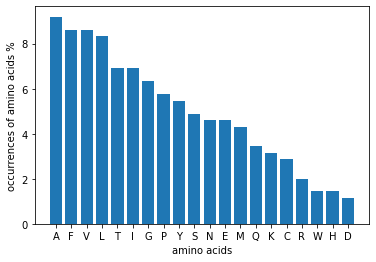

In [0]:
plt.bar(char, newValue)
plt.ylabel("occurrences of amino acids %")
plt.xlabel("amino acids")
plt.rcParams.update({'font.size': 14})
plt.show()

# Part 3 - Plotting an Hydropathy Plot

In [0]:
windowsize = int(input("Enter the windows size: "))
sequence = input("Enter the protein sequence: ")

Enter the windows size: 3
Enter the protein sequence: ABCDEABCDEABCDEABCDEABCDEA


### Reaching Kyte-Doolittle hydrophobicity scores from Kyte-Doolittle.txt

In [0]:
dictionary = {}
with open("Kyte-Doolittle.txt") as f:
    for line in f:
        (key, val) = line.split()
        dictionary[key] = float(val)
dictionary

{'I': 4.5,
 'V': 4.2,
 'L': 3.8,
 'F': 2.8,
 'C': 2.5,
 'M': 1.9,
 'A': 1.8,
 'G': -0.4,
 'T': -0.7,
 'W': -0.9,
 'S': -0.8,
 'Y': -1.3,
 'P': -1.6,
 'H': -3.2,
 'E': -3.5,
 'Q': -3.5,
 'D': -3.5,
 'N': -3.5,
 'K': -3.9,
 'R': -4.5}

### Calculating the Kyte-Doolittle hydrophobicity score of each amino acid

In [0]:
i = 0 
theList = []
while(i < len(sequence)):
    amino_index = 0.0  
    for aminoacid, index in dictionary.items():
        if aminoacid == sequence[i]:
            amino_index = float(index)  
    theList.append(amino_index)
    i = i + 1

In [0]:
theList

[1.8,
 0.0,
 2.5,
 -3.5,
 -3.5,
 1.8,
 0.0,
 2.5,
 -3.5,
 -3.5,
 1.8,
 0.0,
 2.5,
 -3.5,
 -3.5,
 1.8,
 0.0,
 2.5,
 -3.5,
 -3.5,
 1.8,
 0.0,
 2.5,
 -3.5,
 -3.5,
 1.8]

### The amino acid sequence is scanned in successive segments (called windows)

In [0]:
from itertools import tee
from itertools import islice

def window(it, size=3):
    yield from zip(*[islice(it, s, None) for s, it in enumerate(tee(it, size))])

subList = list(window(theList, windowsize))
print(subList)

[(1.8, 0.0, 2.5), (0.0, 2.5, -3.5), (2.5, -3.5, -3.5), (-3.5, -3.5, 1.8), (-3.5, 1.8, 0.0), (1.8, 0.0, 2.5), (0.0, 2.5, -3.5), (2.5, -3.5, -3.5), (-3.5, -3.5, 1.8), (-3.5, 1.8, 0.0), (1.8, 0.0, 2.5), (0.0, 2.5, -3.5), (2.5, -3.5, -3.5), (-3.5, -3.5, 1.8), (-3.5, 1.8, 0.0), (1.8, 0.0, 2.5), (0.0, 2.5, -3.5), (2.5, -3.5, -3.5), (-3.5, -3.5, 1.8), (-3.5, 1.8, 0.0), (1.8, 0.0, 2.5), (0.0, 2.5, -3.5), (2.5, -3.5, -3.5), (-3.5, -3.5, 1.8)]


### Addition of the Kyte-Doolittle hydrophobicity scores for each window

In [0]:
import numpy as np
import numpy
subList = np.array(subList)
sums = []

def sumArray(array):
    a = sum(array)
    sums.append(a)

for i in range(len(subList)):
        print(subList[i])
        sumArray(subList[i])
len(sums)

[1.8 0.  2.5]
[ 0.   2.5 -3.5]
[ 2.5 -3.5 -3.5]
[-3.5 -3.5  1.8]
[-3.5  1.8  0. ]
[1.8 0.  2.5]
[ 0.   2.5 -3.5]
[ 2.5 -3.5 -3.5]
[-3.5 -3.5  1.8]
[-3.5  1.8  0. ]
[1.8 0.  2.5]
[ 0.   2.5 -3.5]
[ 2.5 -3.5 -3.5]
[-3.5 -3.5  1.8]
[-3.5  1.8  0. ]
[1.8 0.  2.5]
[ 0.   2.5 -3.5]
[ 2.5 -3.5 -3.5]
[-3.5 -3.5  1.8]
[-3.5  1.8  0. ]
[1.8 0.  2.5]
[ 0.   2.5 -3.5]
[ 2.5 -3.5 -3.5]
[-3.5 -3.5  1.8]


24

### Obtaining the average hydropathy for each window

In [0]:
averages = []
for y in sums:
    averages = [x/windowsize for x in sums]
averages

[1.4333333333333333,
 -0.3333333333333333,
 -1.5,
 -1.7333333333333334,
 -0.5666666666666667,
 1.4333333333333333,
 -0.3333333333333333,
 -1.5,
 -1.7333333333333334,
 -0.5666666666666667,
 1.4333333333333333,
 -0.3333333333333333,
 -1.5,
 -1.7333333333333334,
 -0.5666666666666667,
 1.4333333333333333,
 -0.3333333333333333,
 -1.5,
 -1.7333333333333334,
 -0.5666666666666667,
 1.4333333333333333,
 -0.3333333333333333,
 -1.5,
 -1.7333333333333334]

###  Calculating the amino acid positions in the middle of each window (x-axis)

In [0]:
import math
import numpy as np

first_middle = windowsize/2
first_middle = math.ceil(first_middle)
last_middle = len(theList)-windowsize+first_middle

x_axis = np.arange(first_middle, last_middle+1)
x_axis

array([ 2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16, 17, 18,
       19, 20, 21, 22, 23, 24, 25])

In [0]:
averages = np.array(averages)
averages

array([ 1.43333333, -0.33333333, -1.5       , -1.73333333, -0.56666667,
        1.43333333, -0.33333333, -1.5       , -1.73333333, -0.56666667,
        1.43333333, -0.33333333, -1.5       , -1.73333333, -0.56666667,
        1.43333333, -0.33333333, -1.5       , -1.73333333, -0.56666667,
        1.43333333, -0.33333333, -1.5       , -1.73333333])

### The hydropathy plot

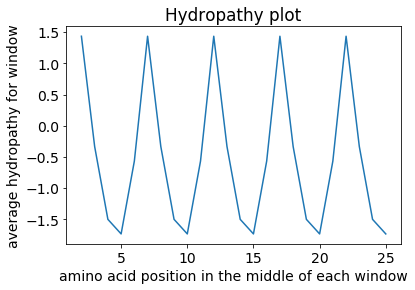

In [0]:
import matplotlib.pyplot as plt
plt.plot(x_axis, averages) 
plt.xlabel('amino acid position in the middle of each window') 
plt.ylabel('average hydropathy for window') 
plt.title('Hydropathy plot') 
plt.show()